<a href="https://colab.research.google.com/github/Rochakr4/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [156]:
#library used
import pandas as pd
import numpy as np
import plotly.express as px  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
#Reading the dataset
bike_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'unicode_escape')

##Analysing data and initial preprocessing 

In [159]:
print(f'Shape of data set is {bike_df.shape}')

Shape of data set is (8760, 14)


In [160]:
#list of features present in dataset
list(bike_df)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [161]:
#Running info() inorder to get information regarding NaN values
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [162]:
#How data set look like
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



*   The data set does not contain any Nan values






In [163]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000




*   Feature like Rainfall and Snowfall has zero as 75% of there values
*   Solar Radiation (MJ/m2) feature has 50% zero values



In [164]:
#Creating new feature for further analysis
bike_df['Solar Radiation']=bike_df['Solar Radiation (MJ/m2)']*0
bike_df['Rainfall']=bike_df['Solar Radiation (MJ/m2)']*0
bike_df['Snowfall']=bike_df['Solar Radiation (MJ/m2)']*0

In [165]:
#Converting some numerical features to categorical feature for better understandability
for col in ['Solar Radiation (MJ/m2)']:
  for i in range(len(bike_df[col])):
    if bike_df[col][i]==0:
      bike_df['Solar Radiation'][i]='low radiation'
    if (bike_df[col][i]>0) and (bike_df[col][i]<=0.93):
      bike_df['Solar Radiation'][i]='Moderate radiation'
    if bike_df[col][i]>0.93:
      bike_df['Solar Radiation'][i]='High radiation'

for col in ['Rainfall(mm)']:
  for i in range(len(bike_df[col])):
    if bike_df[col][i]==0:
      bike_df['Rainfall'][i]='No rain'
    else:
      bike_df['Rainfall'][i]='rain'

for col in ['Snowfall (cm)']:
  for i in range(len(bike_df[col])):
    if bike_df[col][i]==0:
      bike_df['Snowfall'][i]='No Snowfall'
    else:
      bike_df['Snowfall'][i]='Snowfall'

In [166]:
#Droping those features which was converted to categorical values
bike_df=bike_df.drop(columns=['Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'],axis=1)

In [167]:
#Discribtion of dataset
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000


In [168]:
#Date wise average rented bike count
date_wise=px.line(data_frame=bike_df.groupby('Date')['Rented Bike Count'].mean().reset_index()
                    ,y=['Rented Bike Count'],x='Date',title='Date wise average rented bike count')
date_wise.show()

In [169]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [170]:
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()
#Creating 'weekdays_or_weekend' feature for further analysis
bike_df['weekdays_or_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
#Droping unwanted coloumns
bike_df=bike_df.drop(columns=['Date','day'],axis=1)

In [171]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Seasons,Holiday,Functioning Day,Solar Radiation,Rainfall,Snowfall,month,weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes,low radiation,No rain,No Snowfall,12,0


In [172]:
#Changing data type of categorical features which was encoded as int64
cols=['Hour','month','weekdays_or_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('object')

In [173]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Seasons                    8760 non-null   object 
 8   Holiday                    8760 non-null   object 
 9   Functioning Day            8760 non-null   object 
 10  Solar Radiation            8760 non-null   object 
 11  Rainfall                   8760 non-null   object 
 12  Snowfall                   8760 non-null   object 
 13  month                      8760 non-null   objec

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Analysing hourly data with respect to weekdays and weekends')]

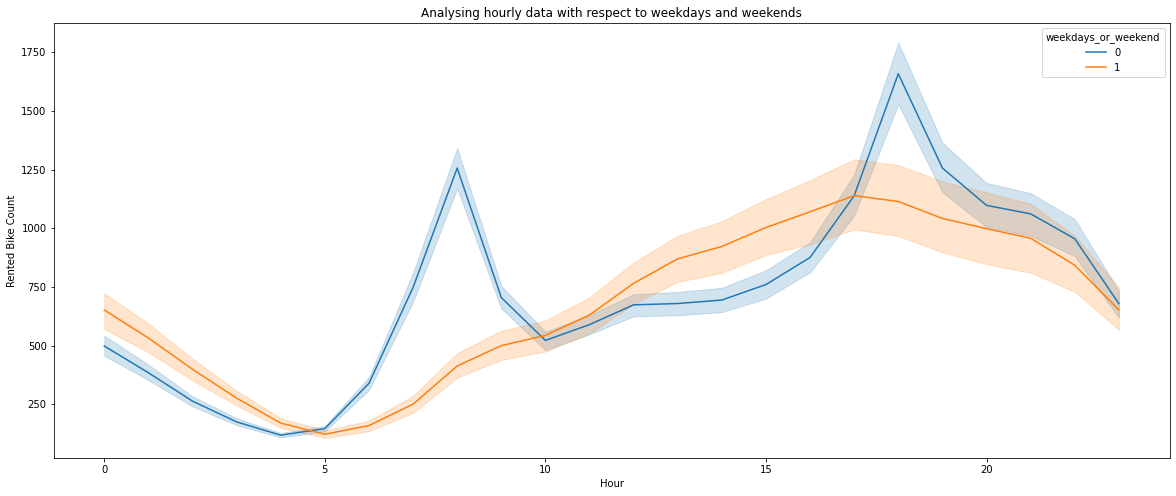

In [174]:
#Comparing weekdays and weekend average rented bike count
change_wise=px.bar(data_frame=bike_df.groupby('weekdays_or_weekend').mean().reset_index(),y=['Rented Bike Count'],x='weekdays_or_weekend',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
change_wise.show()
#Analysing hourly average data with respect to weekdays and weekends
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='weekdays_or_weekend',ax=ax)
ax.set(title='Analysing hourly data with respect to weekdays and weekends')


REMARKS:
*   During weekdays two peak time are recorded at 5am to 10am and 4pm to 8pm
*   No such peak times are recorded in case of weekends
*   with out considering the peak times of weekdays, both the graph follows same trajectory
*   Average use of bike is usually high on weekdays compared to weekends







[Text(0.5, 1.0, 'Season wise hourly analysis ')]

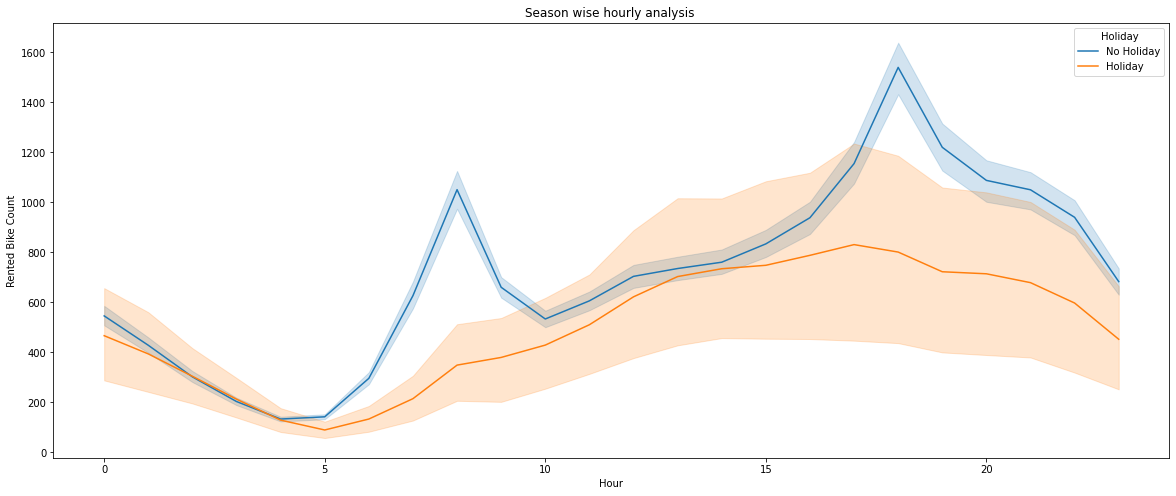

In [175]:
#Holiday wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Holiday')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Holiday',title='Solar Radiation wise average bike rented')
temp_bar.show()
#Holiday wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Holiday')
ax.set(title='Season wise hourly analysis ')


REMARKS

*   Patterns are in away similar to that of Weekdays and weekands



[Text(0.5, 1.0, 'Season wise hourly analysis ')]

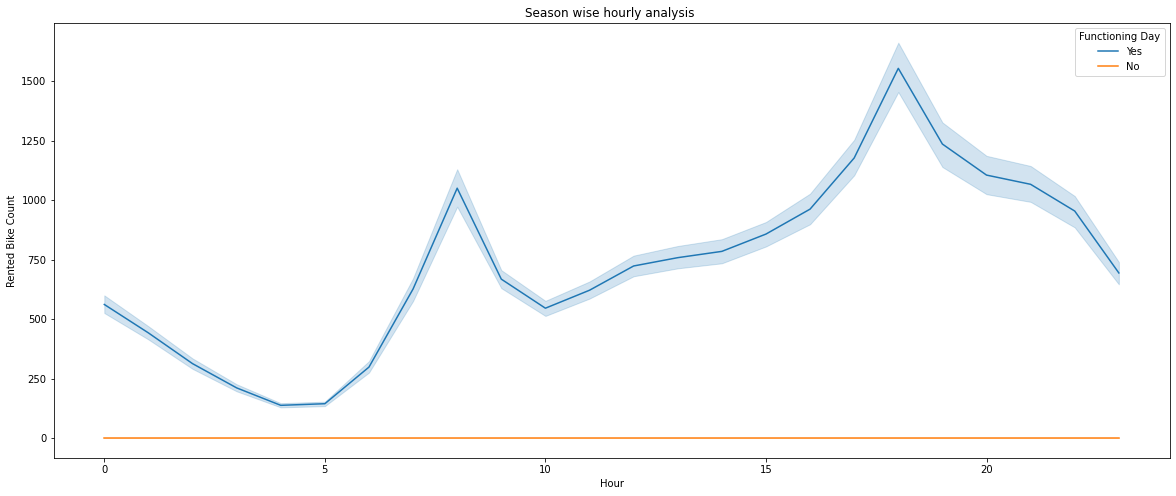

In [176]:
#Functioning Day wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Functioning Day',title='Solar Radiation wise average bike rented')
temp_bar.show()
#Functioning Day wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Functioning Day')
ax.set(title='Season wise hourly analysis ')

REMARKS:
*   Bike use on non funtioning day is zero




[Text(0.5, 1.0, 'Season wise hourly average analysis')]

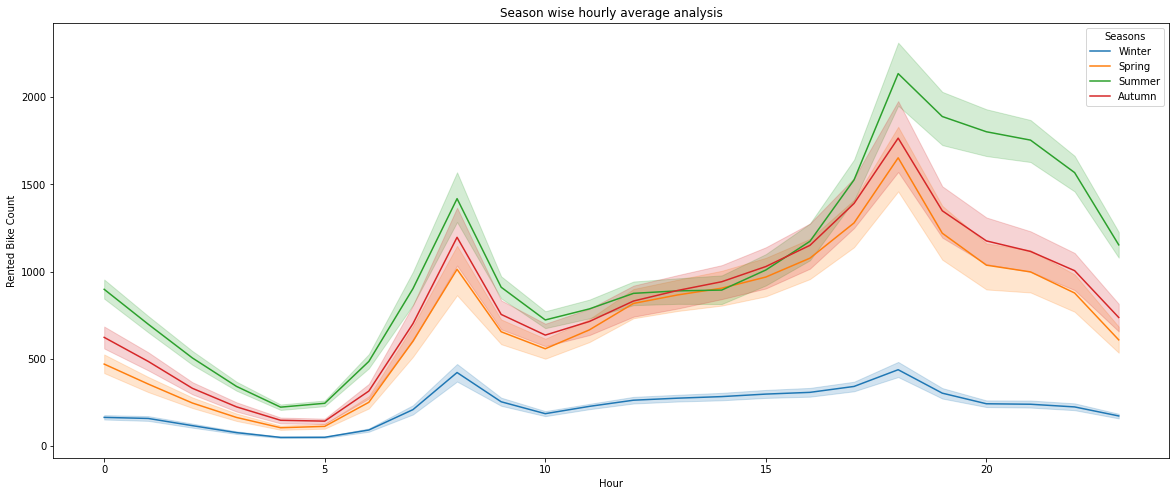

In [177]:
#Season wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Seasons')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Seasons',title='Season wise average bike rented')
temp_bar.show()

#Season wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Seasons')
ax.set(title='Season wise hourly average analysis')

REMARKS:
*   Use of bikes are high in summer followed by autumn, spring and then winter




[Text(0.5, 1.0, 'Season wise hourly analysis ')]

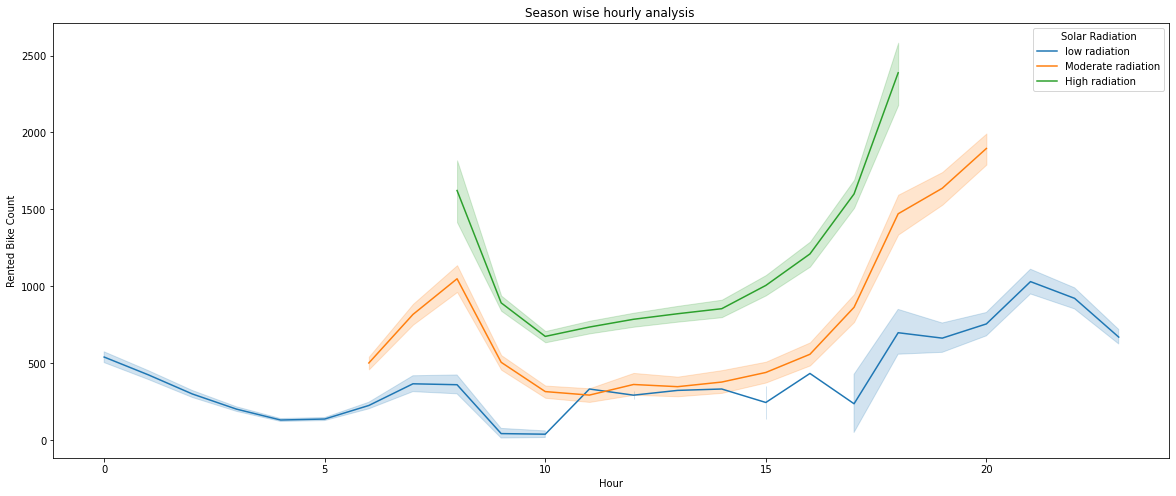

In [178]:
#Solar Radiation wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Solar Radiation')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Solar Radiation',title='Solar Radiation wise average bike rented')
temp_bar.show()

#Radiation wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Solar Radiation')
ax.set(title='Season wise hourly analysis ')

REMARKS

*   Bike use is high on high radition time followed moderate and then low


[Text(0.5, 1.0, 'Season wise hourly analysis ')]

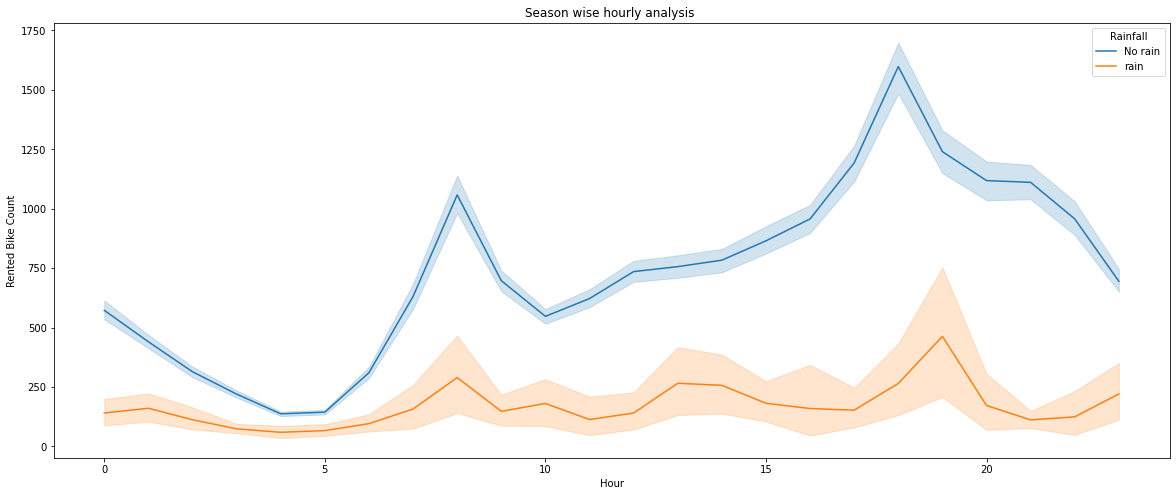

In [179]:
#Rainfall wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Rainfall')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Rainfall',title='Solar Radiation wise average bike rented')
temp_bar.show()
#Rainfall wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Rainfall')
ax.set(title='Season wise hourly analysis ')

REMARKS:

*   Bike use is less during raining time




[Text(0.5, 1.0, 'Season wise hourly analysis ')]

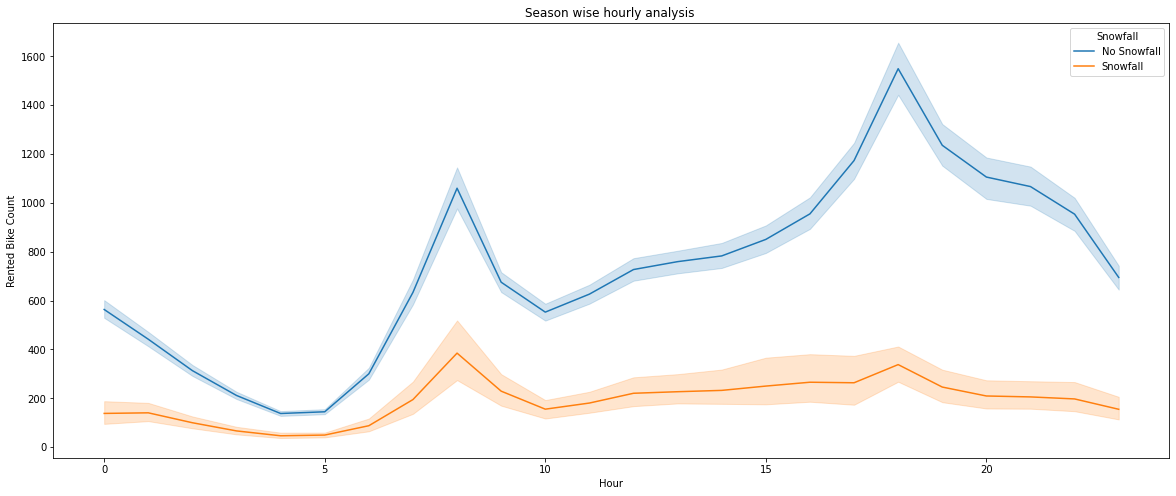

In [180]:
#Snowfall wise average bike rented
temp_bar=px.bar(data_frame=bike_df.groupby('Snowfall')['Rented Bike Count'].mean().reset_index(),y=['Rented Bike Count'],x='Snowfall',title='Solar Radiation wise average bike rented')
temp_bar.show()
#Snowfall wise hourly average analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Snowfall')
ax.set(title='Season wise hourly analysis ')


REMARKS:

*   Bike use is less during snowfall time




# Final preprocessing

In [181]:
#Making a variable for numerical valued columns for further analysis
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)'],
      dtype='object')

##Outlier and distribution analysis

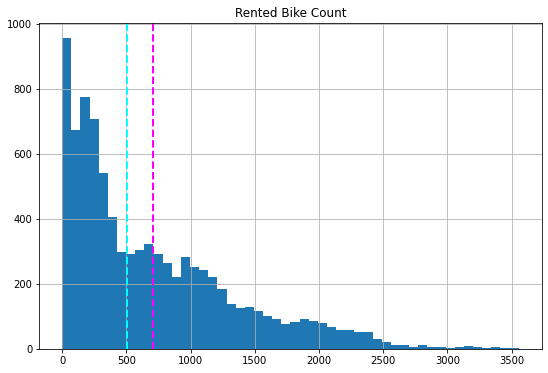

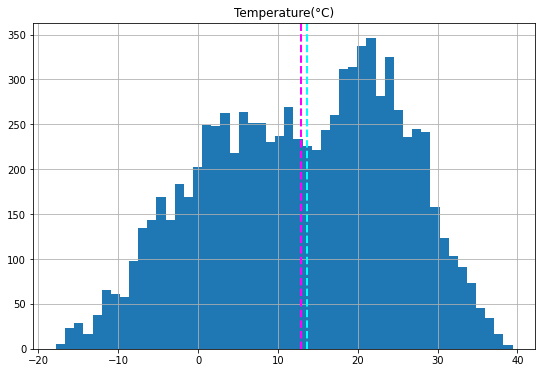

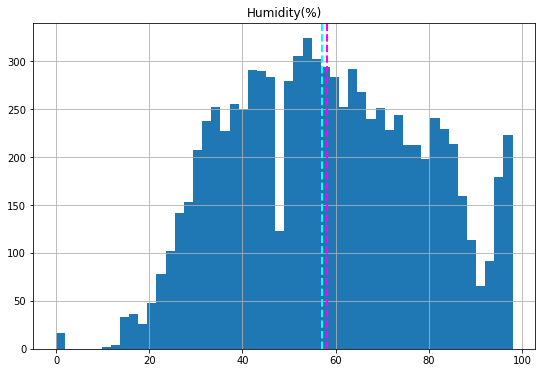

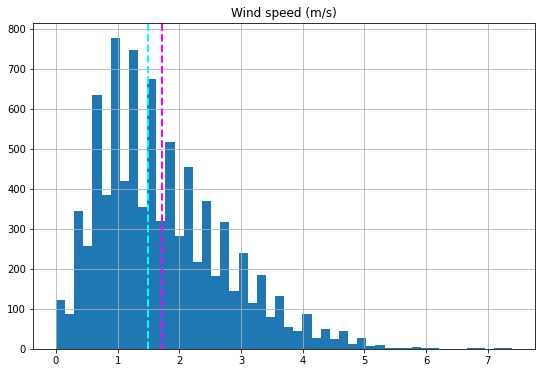

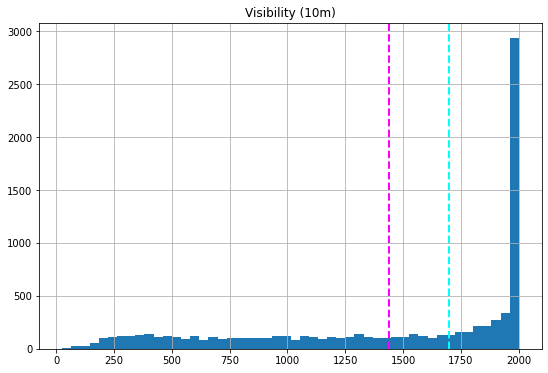

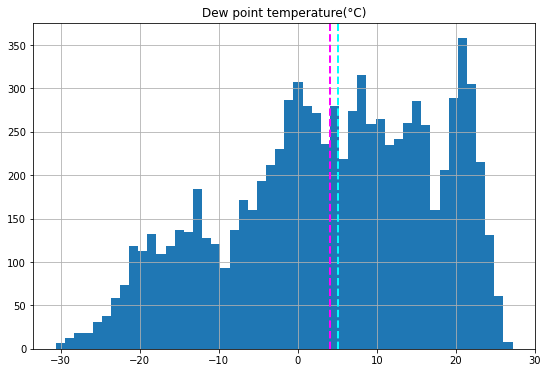

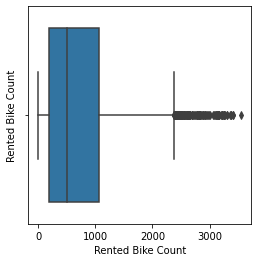

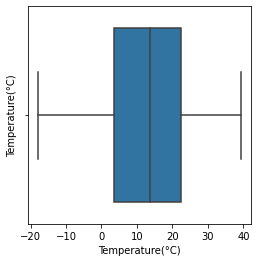

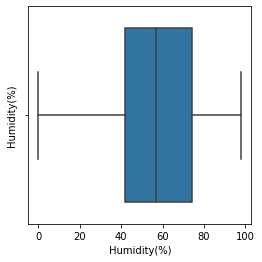

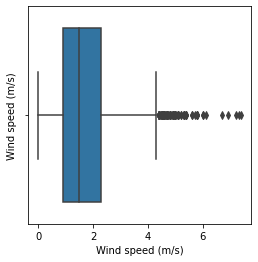

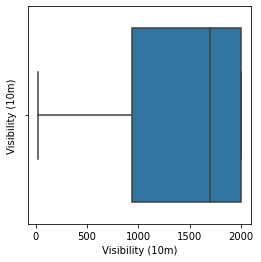

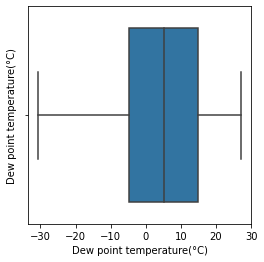

In [182]:
#Hist plot for analysising the data distribution
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = (bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)   
plt.show()

#Box plot for outlier analysis
for col in numerical_features:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(bike_df[col])
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()


REMARKS
*   Here positive skewness is observerd in 'Rented Bike Count' & 'Wind speed (m/s)' features.
*   Here negative skewness is observerd in 'Visibility (10m)' feature.
*   Outliers are observed in  'Rented Bike Count' & 'Wind speed (m/s)' features

Necessary feature transformation and outlier handiling is required for further analysis



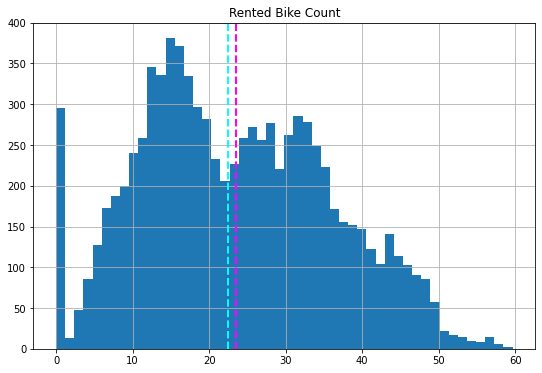

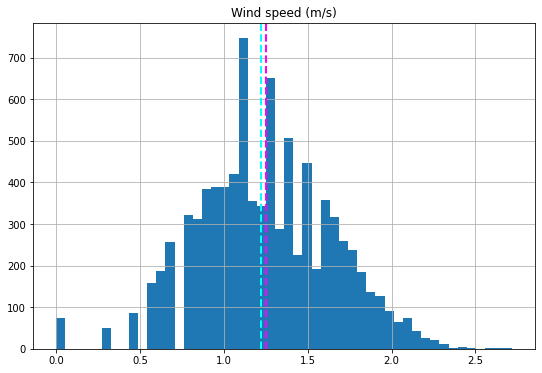

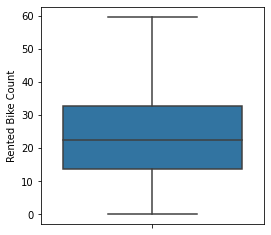

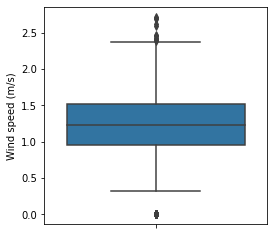

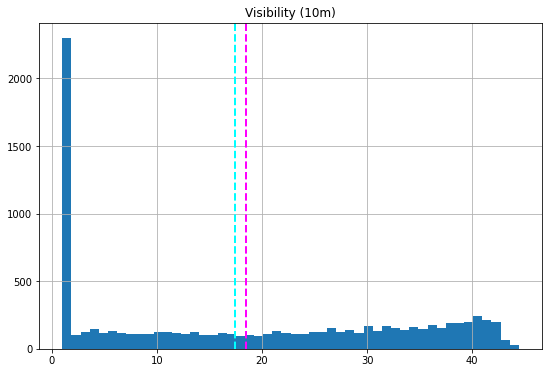

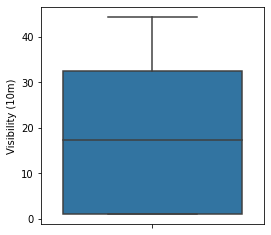

In [183]:
#Sqrt transformation for positively skewed features
#Hist plot for analysising the data distribution
for col in ['Rented Bike Count','Wind speed (m/s)']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
#Box plot for outlier analysis
for col in ['Rented Bike Count','Wind speed (m/s)']:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=np.sqrt(bike_df[col]))
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()



#sqrt(max(x+1)-x) transformation for negatively skewed features
#Hist plot for analysising the data distribution
for col in ['Visibility (10m)']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(max(bike_df[col]+1) - bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
#Box plot for outlier analysis
for col in ['Visibility (10m)']:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=np.sqrt(max(bike_df[col]+1) - bike_df[col]))
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()




REMARKS:

*   Acceptable distribution obtained in all features after transformation.
*   Outliers are still observed in 'Visibility (10m)' feature.



In [184]:
bike_df_copy=bike_df#creating a copy of dataset for further analysis
#Updating the required feature transformation in the dataset
bike_df_copy['Wind speed (m/s) sqrt']=np.sqrt(bike_df_copy['Wind speed (m/s)'])
bike_df_copy['Rented Bike Count sqrt']=np.sqrt(bike_df_copy['Rented Bike Count'])
bike_df_copy['Visibility (10m) sqrt']=np.sqrt(max(bike_df['Visibility (10m)']+1) - bike_df['Visibility (10m)'])
#droping the transformed features
bike_df_copy=bike_df_copy.drop(columns=['Wind speed (m/s)','Rented Bike Count','Visibility (10m)'], axis=1)
#updating the numerical_features variable
numerical_columns=list(bike_df_copy.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)',
       'Wind speed (m/s) sqrt', 'Rented Bike Count sqrt',
       'Visibility (10m) sqrt'],
      dtype='object')

In order to avoid outliers in 'Wind speed (m/s) sqrt' feature values below 0.35 is assigned 0.35 and values above 2.5 is assigned 2.5

In [188]:
tmp=bike_df_copy[(bike_df_copy['Wind speed (m/s) sqrt']<0.35)]['Wind speed (m/s) sqrt'].count()*100/bike_df_copy['Wind speed (m/s) sqrt'].count() + bike_df_copy[(bike_df_copy['Wind speed (m/s) sqrt']>2.5)]['Wind speed (m/s) sqrt'].count()*100/bike_df_copy['Wind speed (m/s) sqrt'].count()
print(f'Datas with Wind speed (m/s) sqrt value less than 0.35 and above 2.5 consititute {round(tmp,2)}% of total.')

Datas with Wind speed (m/s) sqrt value less than 0.35 and above 2.5 consititute 1.46% of total.


In [189]:
#Implementing the same
bike_df_copy.loc[(bike_df_copy['Wind speed (m/s) sqrt'] > 2.5),'Wind speed (m/s) sqrt'] = 2.5
bike_df_copy.loc[(bike_df_copy['Wind speed (m/s) sqrt'] < 0.35),'Wind speed (m/s) sqrt'] = 0.35

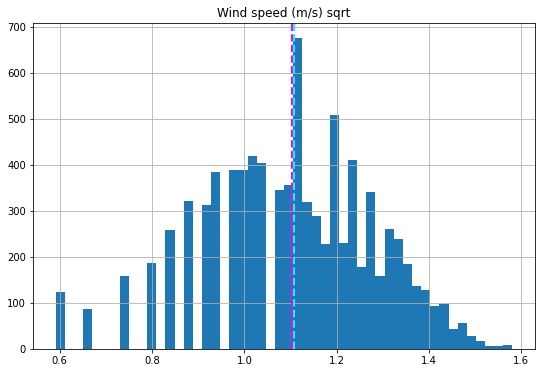

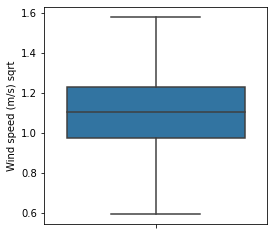

In [190]:
#Further analysis the 'Wind speed (m/s) sqrt' feature
for col in ['Wind speed (m/s) sqrt']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df_copy[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

for col in ['Wind speed (m/s) sqrt']:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=np.sqrt(bike_df_copy[col]))
  fig.set_title('')
  fig.set_ylabel(col)
plt.show()

REMARKS:
*   outlier issue in 'Wind speed (m/s) sqrt' is resolved.

# Correlation analysis

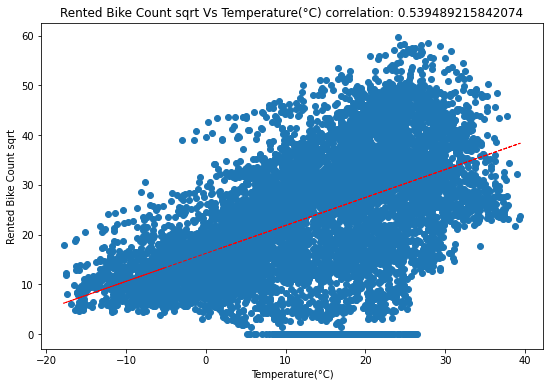

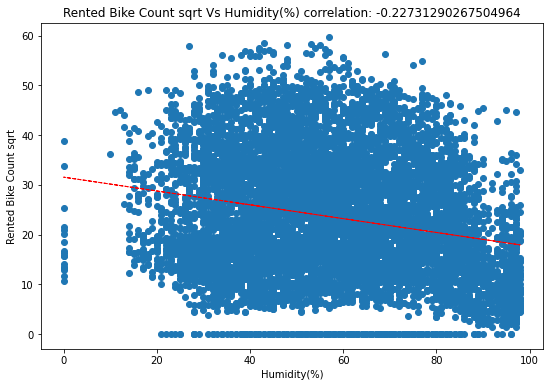

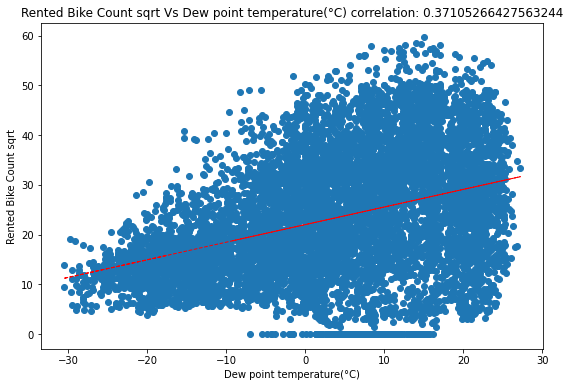

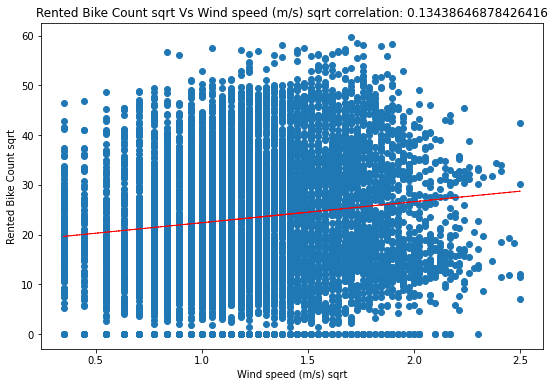

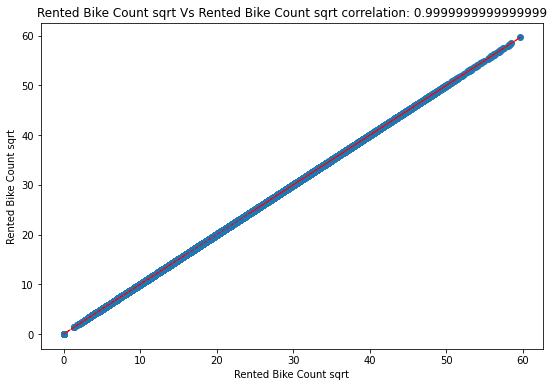

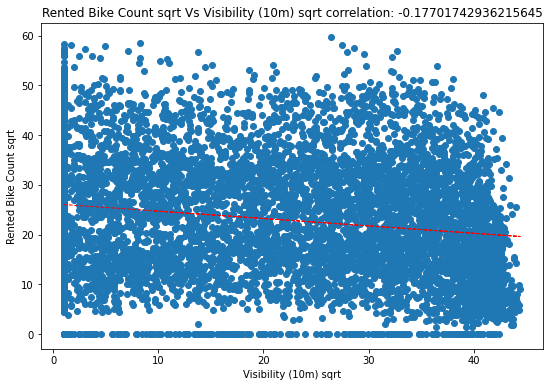

In [191]:
#Target feature vs other features
for col in numerical_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=bike_df_copy[col]
    label=bike_df_copy['Rented Bike Count sqrt']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count sqrt')
    ax.set_title('Rented Bike Count sqrt Vs '+col + ' correlation: ' + str(correlation) )
    z=np.polyfit(feature,label,1)
    y_hat=np.poly1d(z)(bike_df_copy[col])
    plt.plot(bike_df_copy[col],y_hat,"r--",lw=1)
    plt.show()


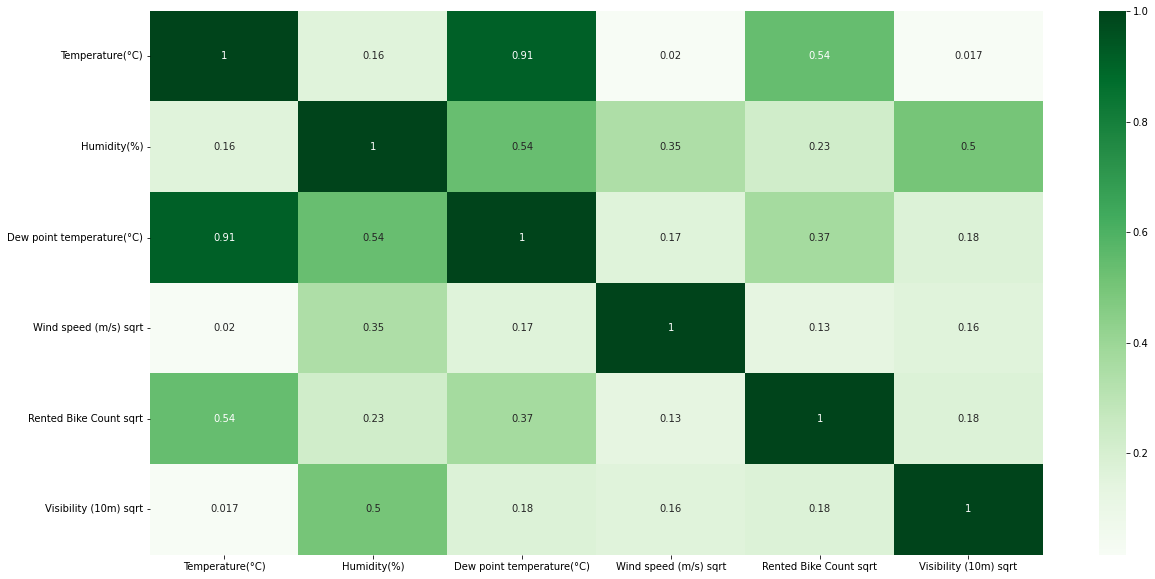

In [192]:
#Correlation plot
plt.figure(figsize=(20,10))
correlation=bike_df_copy[numerical_features].corr()
sns.heatmap(abs(correlation),annot=True,cmap='Greens')

REMARKS:

*   Since 'Dew point temperature(°C)' and 'Temperature(°C)' has correlation of 0.91 'Dew point temperature(°C)' will be dropped from futher analysis




In [193]:
#Dropping 'Dew point temperature(°C)' feature
bike_df_copy=bike_df_copy.drop(['Dew point temperature(°C)'],axis=1)

In [194]:
#Assigning a variable for categorical features
categorical_features=list(bike_df_copy.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'month', 'weekdays_or_weekend'],
      dtype='object')

In [197]:
#Checking VIF score
#defining function to calculate VIF
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [198]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns] ] )

,variables,VIF
0,Temperature(°C),3.350707
1,Humidity(%),7.563323
2,Wind speed (m/s) sqrt,6.104104
3,Rented Bike Count sqrt,6.107701
4,Visibility (10m) sqrt,3.440285


REMARKS:

*   All VIF score is acceptable



# One hot encoding on categorical features

In [199]:
#defining a function for one hot encoding
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Temperature(°C),Humidity(%),Wind speed (m/s) sqrt,Rented Bike Count sqrt,Visibility (10m) sqrt,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_or_weekend_1
0,-5.2,37,1.483240,15.937377,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.894427,14.282857,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.000000,13.152946,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.948683,10.344080,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,1.516575,8.831761,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Initialising regression parameters

In [200]:
#Assigning the values for X and Y
X = bike_df_copy.drop(columns=['Rented Bike Count sqrt'], axis=1)
y = bike_df_copy['Rented Bike Count sqrt']

In [201]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 48)
(2190, 48)


# Linear regression

In [202]:
#Initialising linear regression
reg= LinearRegression().fit(X_train, y_train)

In [203]:
#Predicting y values for testing and training dataset
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [211]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )


MSE Train: 87592.44897723482
MSE Test: 86433.19036022766
RMSE Train: 295.96021519324995
RMSE Test: 293.99522166223664
MAE Train: 201.88750446802226
MAE Test: 200.8415186592906
R2 Train: 0.7892150670281255
R2 Test: 0.7927806978544898
Adjusted R2 Train: 0.7844893889418807
Adjusted R2 Test: 0.7881349591795788


In [212]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr1),2),
       'MSE':round((MSE_lr1),2),
       'RMSE':round((RMSE_lr1),2),
       'R2_score':round((r2_lr1),2),
       'Adjusted R2':round((Adjusted_R2_lr1 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr2),3),
       'MSE':round((MSE_lr2),3),
       'RMSE':round((RMSE_lr2),3),
       'R2_score':round((r2_lr2),3),
       'Adjusted R2':round((Adjusted_R2_lr2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

In [213]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train[:200],'Actual':np.array(y_train[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test[:200],'Actual':np.array(y_test[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

REMARKS:

*   The performance of linear regression is decent with a R2 score of 0.789 on testing dataset




#**LASSO REGRESSION** 

In [214]:
#Initialising lasso regularization regression
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)

Lasso(max_iter=3000)

In [217]:
#Predicting y values for testing and training dataset
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [220]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_lasso**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_lasso**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_lasso**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_lasso**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_lasso**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_lasso**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_lasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_lasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr1),2),
       'MSE':round((MSE_lr1),2),
       'RMSE':round((RMSE_lr1),2),
       'R2_score':round((r2_lr1),2),
       'Adjusted R2':round((Adjusted_R2_lr1 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr2),3),
       'MSE':round((MSE_lr2),3),
       'RMSE':round((RMSE_lr2),3),
       'R2_score':round((r2_lr2),3),
       'Adjusted R2':round((Adjusted_R2_lr2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

MSE Train: 274454.27444039326
MSE Test: 276387.3018487612
RMSE Train: 523.8838367810113
RMSE Test: 525.7255004741174
MAE Train: 363.7055548946608
MAE Test: 366.3369357370222
R2 Train: 0.3395455142851629
R2 Test: 0.33737510356513556
Adjusted R2 Train: 0.32473850106035573
Adjusted R2 Test: 0.32251943096874436


In [221]:
#Predicted vs Actual for train data
temp_df=pd.DataFrame({'Predicted':y_pred_train_lasso[:200],'Actual':np.array(y_train[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data')
predvsactual.show()
#Predicted vs Actual for test data
temp_df=pd.DataFrame({'Predicted':y_pred_test_lasso[:200],'Actual':np.array(y_test[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data')
predvsactual.show()

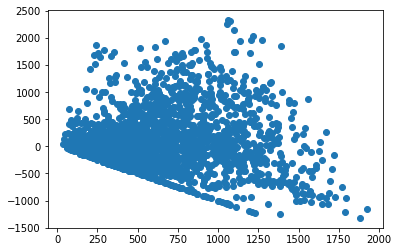

In [226]:
#Heteroscadacity
plt.scatter((y_pred_test_lasso**2),(y_test**2-y_pred_test_lasso**2))

# Running Grid Search Cross Validation for lasso Regression

In [230]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -30.190725206308986


In [228]:
y_pred_train_gridlasso = lasso_regressor.predict(X_train)
y_pred_test_gridlasso = lasso_regressor.predict(X_test)

In [229]:
#Evaluating the model for training and testing dataset
#calculate MSE
MSE_lr1= mean_squared_error((y_train**2), (y_pred_train_gridlasso**2))
print("MSE Train:",MSE_lr1)
MSE_lr2= mean_squared_error(y_test**2, y_pred_test_gridlasso**2)
print("MSE Test:",MSE_lr2)
#calculate RMSE
RMSE_lr1=np.sqrt(MSE_lr1)
print("RMSE Train:",RMSE_lr1)
RMSE_lr2=np.sqrt(MSE_lr2)
print("RMSE Test:",RMSE_lr2)
#calculate MAE
MAE_lr1= mean_absolute_error(y_train**2, y_pred_train_gridlasso**2)
print("MAE Train:",MAE_lr1)
MAE_lr2= mean_absolute_error(y_test**2, y_pred_test_gridlasso**2)
print("MAE Test:",MAE_lr2)
#calculate r2 and adjusted r2
r2_lr1= r2_score(y_train**2, y_pred_train_gridlasso**2)
print("R2 Train:",r2_lr1)
r2_lr2= r2_score((y_test**2), (y_pred_test_gridlasso**2))
print("R2 Test:",r2_lr2)
Adjusted_R2_lr1 = (1-(1-r2_score(y_train**2, y_pred_train_gridlasso**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 Train:",Adjusted_R2_lr1)
Adjusted_R2_lr2 = (1-(1-r2_score((y_test**2), (y_pred_test_gridlasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 Test:",Adjusted_R2_lr2 )

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression after cross validation',
       'MAE':round((MAE_lr1),2),
       'MSE':round((MSE_lr1),2),
       'RMSE':round((RMSE_lr1),2),
       'R2_score':round((r2_lr1),2),
       'Adjusted R2':round((Adjusted_R2_lr1 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression after cross validation',
       'MAE':round((MAE_lr2),3),
       'MSE':round((MSE_lr2),3),
       'RMSE':round((RMSE_lr2),3),
       'R2_score':round((r2_lr2),3),
       'Adjusted R2':round((Adjusted_R2_lr2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

MSE Train: 87592.54395361146
MSE Test: 86433.33113580613
RMSE Train: 295.9603756478415
RMSE Test: 293.9954610802795
MAE Train: 201.88747510458813
MAE Test: 200.8415826499242
R2 Train: 0.7892148384743013
R2 Test: 0.792780360351998
Adjusted R2 Train: 0.7844891552640101
Adjusted R2 Test: 0.7881346141104734


In [580]:
temp_df=pd.DataFrame({'Predicted':y_pred_lasso[:200],'Actual':np.array(y_test[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data for lasso regression after hyper parameter tuning')
predvsactual.show()


# **RIDGE REGRESSION**

In [581]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [582]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [583]:
#check the score
ridge.score(X_train, y_train)

0.8073022807120072

In [584]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [585]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 29.673652596140524
RMSE : 5.44735280628495
MAE : 4.155499657575939
R2 : 0.8073022807120072
Adjusted R2 : 0.8028900432142915


**Looks like our r2 score value is 0.77 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [586]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [587]:
temp_df=pd.DataFrame({'Predicted':y_pred_train_ridge[:200],'Actual':np.array(y_train[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data for ridge regression')
predvsactual.show()


In [588]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 29.483053314471576
RMSE : 5.429829952629417
MAE : 4.1693909653779935
R2 : 0.8133587098892635
Adjusted R2 : 0.8090851476390644


**The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [589]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [590]:
temp_df=pd.DataFrame({'Predicted':y_pred_test_ridge[:200],'Actual':np.array(y_test[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data for ridge regression')
predvsactual.show()


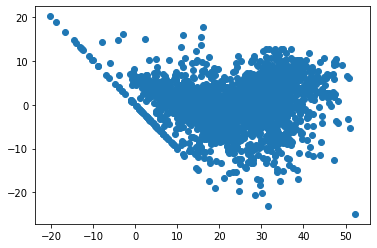

In [591]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [592]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [593]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -30.133679495749984


In [594]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [595]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 29.482762976692037
RMSE : 5.429803217124174
R2 : 0.8133605478609676
Adjusted R2 :  0.8090870276951673


In [596]:
temp_df=pd.DataFrame({'Predicted':y_pred_ridge[:200],'Actual':np.array(y_test[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data for ridge regression after hyper parameter tuning')
predvsactual.show()

# **ELASTIC NET REGRESSION**

In [597]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [598]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [599]:
#check the score
elasticnet.score(X_train, y_train)

0.6470933761259996

In [600]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [601]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 54.34433056295357
RMSE : 7.371860725960141
MAE : 5.623628347027935
R2 : 0.6470933761259996
Adjusted R2 : 0.639012803897109


**Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [602]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [603]:
temp_df=pd.DataFrame({'Predicted':y_pred_train_en[:200],'Actual':np.array(y_train[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for train data for elastic net regression')
predvsactual.show()

In [604]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 56.79647455584375
RMSE : 7.536343580002424
MAE : 5.738709277899104
R2 : 0.6404521888633199
Adjusted R2 : 0.632219552066265


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [605]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [606]:
temp_df=pd.DataFrame({'Predicted':y_pred_test_en[:200],'Actual':np.array(y_test[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data for elastic net regression')
predvsactual.show()

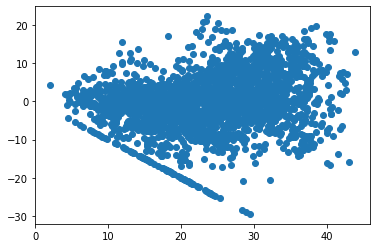

In [607]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# <b> Running Grid Search Cross Validation for ELastic Net Regression

In [608]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [609]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [610]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.6}

Using  {'alpha': 0.0001, 'l1_ratio': 0.6}  the negative mean squared error is:  -30.27013534501708


In [611]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 29.48420054723525
RMSE : 5.429935593286098
R2 : 0.8133514473781258
Adjusted R2 :  0.8090777188367838


In [612]:
temp_df=pd.DataFrame({'Predicted':y_pred_elastic[:200],'Actual':np.array(y_test[:200])})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data for elastic net regression after hyperparameter tuning')
predvsactual.show()

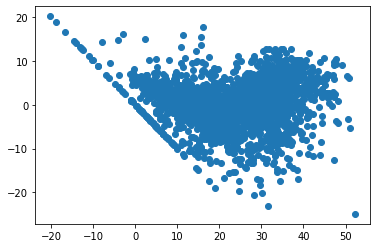

In [613]:
#Heteroscadacity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))

In [614]:
(y_pred_lasso)

array([17.81084946, 23.42302378, 21.74123954, ..., 39.70833068,
        1.11540094, 30.80002367])

In [615]:
(y_test)

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented Bike Count sqrt, Length: 2190, dtype: float64

# **RANDOM FOREST**

In [57]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [59]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train**2))

#calculate MSE
MSE_rf= mean_squared_error(y_train**2, y_pred_train_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train**2, y_pred_train_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train**2, y_pred_train_r**2)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train**2, y_pred_train_r**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train**2, y_pred_train_r**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: -1.0912613795689987
MSE : 4669.895742042086
RMSE : 68.33663543109279
MAE : 40.45758811451485
R2 : 0.9887622315340469
Adjusted R2 : 0.9885049181439386


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [60]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [61]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test**2, y_pred_test_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test**2, y_pred_test_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test**2), (y_pred_test_r**2))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test**2), (y_pred_test_r**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test**2), (y_pred_test_r**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 39573.27060278703
RMSE : 198.93031594703464
MAE : 113.46787993802042
R2 : 0.9051250395392282
Adjusted R2 : 0.9029526689492385


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [62]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

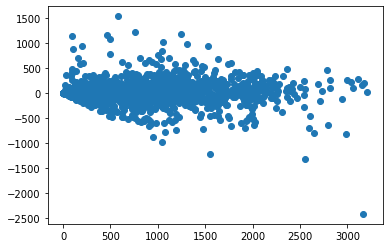

In [63]:
#Heteroscadacity
plt.scatter((y_pred_test_r**2),(y_test**2)-(y_pred_test_r**2))

In [64]:

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : rf_model.feature_importances_}

importance_df = pd.DataFrame(importance_dict)

In [65]:
temp_df=importance_df.sort_values(by=['Feature Importance'],ascending=False).reset_index()

In [66]:
predvsactual=px.bar(data_frame=temp_df[temp_df['Feature Importance']>0],y='Feature',x='Feature Importance',title='Predicted vs Actual for test data for random forest',height=1000,width=800)
predvsactual.show()

In [67]:
temp_df=pd.DataFrame({'Predicted':y_pred_test_r[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data for random forest')
predvsactual.show()

In [68]:
n_estimators= [160,210,10]
max_depth = [25,35,1]
min_samples_split = [2,5,1]
min_samples_leaf = [1,5,1]
max_features= [4,10,1]

In [69]:
random_grid = {'n_estimators' : n_estimators,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

print(random_grid)   

{'n_estimators': [160, 210, 10], 'max_depth': [25, 35, 1], 'min_samples_split': [2, 5, 1], 'min_samples_leaf': [1, 5, 1], 'max_features': [4, 10, 1]}


In [70]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
#defining the predicted variables
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

In [80]:


rf_grid = GridSearchCV(estimator= rf_model ,param_grid= random_grid ,scoring='neg_mean_squared_error', cv = 5)

In [81]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [25, 35, 1], 'max_features': [4, 10, 1],
                         'min_samples_leaf': [1, 5, 1],
                         'min_samples_split': [2, 5, 1],
                         'n_estimators': [160, 210, 10]},
             scoring='neg_mean_squared_error')

In [82]:
rf_grid.best_params_

{'max_depth': 35,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 160}

In [84]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

In [85]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test**2, pred_test**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test**2, pred_test**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test**2), (pred_test**2))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test**2), (pred_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test**2), (pred_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 38911.68850356652
RMSE : 197.26045854039404
MAE : 112.48131156698463
R2 : 0.9067111499250774
Adjusted R2 : 0.9045750968158852


In [86]:
temp_df=pd.DataFrame({'Predicted':pred_test[:200]**2,'Actual':np.array(y_test[:200]**2)})
predvsactual=px.line(data_frame=temp_df,y=['Predicted','Actual'],title='Predicted vs Actual for test data for random forest')
predvsactual.show()

# Result

In [627]:
temp=px.bar(data_frame=training_df,y=['MAE','MSE','RMSE','R2_score','Adjusted R2'],x='Model',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
temp.show()

temp=px.bar(data_frame=test_df,y=['MAE','MSE','RMSE','R2_score','Adjusted R2'],x='Model',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
temp.show()

In [88]:
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model      MAE        MSE     RMSE  \
Training set 0         Linear regression     4.160     29.670    5.450   
             1  Random forest regression    40.458   4669.896   68.337   
Test set     0         Linear regression     4.169     29.483    5.430   
             1  Random forest regression   113.468  39573.271  198.930   

                R2_score  Adjusted R2  
Training set 0     0.810         0.80  
             1     0.989         0.99  
Test set     0     0.813         0.81  
             1     0.905         0.90